In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [67]:
Utk_tourist=pd.read_csv("export1.csv")

In [68]:
Utk_tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   place             172 non-null    object
 1   Adventure         172 non-null    int64 
 2   Recreation        172 non-null    int64 
 3   Beauty            172 non-null    int64 
 4   Pilgrim           172 non-null    int64 
 5   History           172 non-null    int64 
 6   Trekcamp          172 non-null    int64 
 7   Food and Culture  172 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 10.9+ KB


In [69]:
Utk_tourist.describe()

,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Food and Culture
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,54.011628,45.796512,71.313953,66.412791,66.261628,47.040698,55.081395
std,26.394220,31.142746,20.946192,26.847380,25.552060,33.738131,31.611019
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.750000,18.750000,60.000000,60.000000,50.000000,10.000000,30.750000
50%,58.500000,47.500000,75.000000,75.000000,75.000000,49.500000,60.000000
75%,73.500000,70.250000,85.000000,85.000000,85.000000,78.250000,84.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [70]:
Attribute_rates = Utk_tourist.iloc[:,[1, 2, 3, 4, 5, 6, 7]].values

In [71]:
Attribute_rates

array([[ 50,  70,  80, ...,  50,   0,  85],
       [ 90, 100,  60, ...,  90,  50, 100],
       [ 95,  90,  65, ...,  91,  49, 100],
       ...,
       [ 65,  20,  89, ...,  55,  94,   0],
       [ 60,  74,  75, ...,   9,   0,  80],
       [ 75,  20,  80, ...,  45,  91,   0]], dtype=int64)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


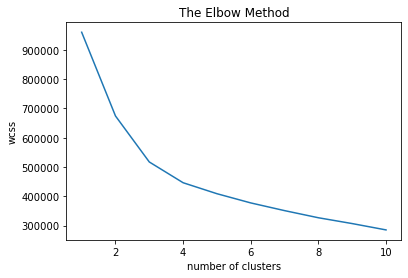

In [72]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Attribute_rates)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()


In [73]:
kmeans=KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
Clusters=kmeans.fit_predict(Attribute_rates)

In [74]:
Clusters

array([3, 0, 0, 0, 3, 0, 0, 1, 3, 1, 2, 2, 3, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 3, 0, 2,
       0, 2, 0, 1, 3, 2, 3, 2, 1, 1, 0, 1, 1, 2, 3, 3, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 1, 0, 0, 3,
       2, 3, 3, 3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 3, 3, 2, 3, 2, 0, 0, 3,
       0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 3, 2])

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(Attribute_rates.data)
pca_2d = pca.transform(Attribute_rates.data)

In [76]:
pca_2d

array([[ 6.30219729e+01,  1.49986054e+01],
       [ 6.35034609e+01,  5.15447059e+01],
       [ 4.73425102e+01,  2.89025786e+01],
       [ 4.37383563e+01,  6.92565503e+00],
       [ 5.02481349e+00,  1.00284693e+02],
       [ 1.00268465e+02, -1.61433063e+01],
       [ 8.58103162e+01, -4.03585023e+01],
       [ 2.64053156e+01, -1.69386074e+01],
       [ 1.63088194e+01,  1.59062780e+01],
       [-3.30751516e+01, -4.90385134e+01],
       [-5.37096701e+01, -2.88192568e+01],
       [-7.46056353e+01, -1.96079636e+01],
       [-2.50612159e+01,  3.92679962e+01],
       [ 3.77952142e+01,  8.99146789e+00],
       [ 7.50832592e+01,  3.92647472e+00],
       [-8.80033585e+01,  1.65214882e+01],
       [-6.37070136e+01, -3.71684160e+01],
       [-7.86031169e+01,  6.57062845e+00],
       [-2.24413075e+01, -3.03570304e+01],
       [-5.87357359e+01, -1.32743917e+01],
       [-6.82390420e+01, -8.58405392e+00],
       [-8.89057140e+01, -4.43267891e+00],
       [ 2.74013907e+00, -1.05700217e+01],
       [-7.

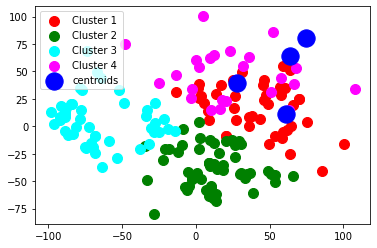

In [77]:
plt.scatter(pca_2d[Clusters==0, 0], pca_2d[Clusters==0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(pca_2d[Clusters==1, 0], pca_2d[Clusters==1, 1], s=100, c="green", label="Cluster 2")
plt.scatter(pca_2d[Clusters==2, 0], pca_2d[Clusters==2, 1], s=100, c="cyan", label="Cluster 3")
plt.scatter(pca_2d[Clusters==3, 0], pca_2d[Clusters==3, 1], s=100, c="magenta", label="Cluster 4")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="blue", label="centroids")
plt.legend()
plt.show()

In [78]:
kmeans.cluster_centers_

array([[74.61363636, 80.45454545, 59.52272727, 68.02272727, 74.25      ,
        41.97727273, 85.15909091],
       [27.85714286, 39.76785714, 68.08928571, 70.26785714, 74.5       ,
        16.14285714, 53.33928571],
       [60.78723404, 10.85106383, 88.59574468, 78.29787234, 72.65957447,
        84.93617021, 22.55319149],
       [63.6       , 64.        , 66.8       , 32.6       , 21.72      ,
        53.92      , 67.2       ]])

In [79]:
Utk_tourist["Cluster"]=Clusters

In [80]:
Utk_tourist

,place,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Food and Culture,Cluster
0,Jim Corbett National Park,50,70,80,0,50,0,85,3
1,Mussoorie,90,100,60,10,90,50,100,0
2,Nainital,95,90,65,67,91,49,100,0
3,Almora,55,91,71,72,90,52,97,0
4,Auli,97,60,81,9,11,94,75,3
...,...,...,...,...,...,...,...,...,...
167,Shri Siddhbali dham,20,38,40,60,77,9,95,1
168,Kartik Swami,15,15,75,80,80,15,52,1
169,Panwali Kantha,65,20,89,91,55,94,0,2
170,Robber's Cave,60,74,75,0,9,0,80,3


In [81]:
Cluster_0 = Utk_tourist[Utk_tourist.Cluster == 0]

In [82]:
len(Cluster_0)

44

In [83]:
Cluster_1 = Utk_tourist[Utk_tourist.Cluster == 1]

In [84]:
len(Cluster_1)

56

In [85]:
Cluster_2 = Utk_tourist[Utk_tourist.Cluster == 2]

In [86]:
len(Cluster_2)

47

In [87]:
Cluster_3 = Utk_tourist[Utk_tourist.Cluster == 3]

In [88]:
len(Cluster_3)

25

In [89]:
mean_cluster0 = Cluster_0.mean()

In [90]:
categories_cluster0 = []
for i in mean_cluster0.keys():
    if mean_cluster0[i] >= 60:
        categories_cluster0.append(i)
        

In [91]:
categories_cluster0

['Adventure', 'Recreation', 'Pilgrim', 'History', 'Food and Culture']

In [92]:
mean_cluster1 = Cluster_1.mean()

In [93]:
categories_cluster1 = []
for i in mean_cluster1.keys():
    if mean_cluster1[i] >= 60:
        categories_cluster1.append(i)
        

In [94]:
categories_cluster1

['Beauty', 'Pilgrim', 'History']

In [95]:
mean_cluster2 = Cluster_2.mean()

In [96]:
categories_cluster2 = []
for i in mean_cluster2.keys():
    if mean_cluster2[i] >= 60:
        categories_cluster2.append(i)
        

In [97]:
categories_cluster2

['Adventure', 'Beauty', 'Pilgrim', 'History', 'Trekcamp']

In [98]:
mean_cluster3 = Cluster_3.mean()

In [99]:
categories_cluster3 = []
for i in mean_cluster3.keys():
    if mean_cluster3[i] >= 60:
        categories_cluster3.append(i)

In [100]:
categories_cluster3

['Adventure', 'Recreation', 'Beauty', 'Food and Culture']

In [119]:
Cluster_0

,place,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Food and Culture,Cluster
1,Mussoorie,90,100,60,10,90,50,100,0
2,Nainital,95,90,65,67,91,49,100,0
3,Almora,55,91,71,72,90,52,97,0
5,Dehradun,40,98,8,41,87,0,100,0
6,Haridwar,42,96,15,99,93,0,98,0
13,Ranikhet,60,90,45,92,85,65,90,0
14,Rishikesh,100,95,20,95,87,15,98,0
39,Nainital Lake / Naini Lake (Near Nainital),86,90,70,67,91,49,100,0
42,Bhimtal (Near Nainital),80,80,85,65,69,45,40,0
44,Naukuchia Taal (Near Nainital),80,75,85,75,70,75,40,0


In [122]:
with open('Cluster_0.json', 'w') as f:
    json.dump(list(Cluster_0.place), f) 

In [123]:
with open('Cluster_1.json', 'w') as f:
    json.dump(list(Cluster_1.place), f) 

In [124]:
with open('Cluster_2.json', 'w') as f:
    json.dump(list(Cluster_2.place), f) 

In [125]:
with open('Cluster_3.json', 'w') as f:
    json.dump(list(Cluster_3.place), f) 

In [111]:
with open('categories_cluster0.json', 'w') as f:
    json.dump(categories_cluster0, f)

In [113]:
with open('categories_cluster1.json', 'w') as f:
    json.dump(categories_cluster1, f)

In [115]:
with open('categories_cluster2.json', 'w') as f:
    json.dump(categories_cluster2, f)

In [117]:
with open('categories_cluster3.json', 'w') as f:
    json.dump(categories_cluster3, f)